# Week 7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Great content about what to be careful about in linear regression modeling
# https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

## Day 2: Nonlinear Regression and Model Assessment
Today we take a closer look at cases when the linear model does not apply. Further, we talk about how to assess the model using machine learning approach to the process.

### Example 1: fake linear relationship
A substance is slowly dissolving in acid. The data in `acid_solution.csv` contains measurements of the time (in minutes) after the start of the process, and percent of the substance that has dissolved by that time.
Is there evidence that there is a linear relationship between time passed and the percent of dissolved substance?

In [ ]:
# Load data


In [ ]:
# Build the model


In [ ]:
# Establishing if the model is good
# Use r^2 and residuals


# Residual plot and the distribution of the residuals


In [2]:
# Fittina a nonlinear model
from sklearn.preprocessing import PolynomialFeatures

# Instance the transformer, transform the data


# Build the model



In [ ]:
# Plot the two models


### Comparing models: an ML approach
In ML the approach to testing the model performance is generally independent of the statistical measures. The following approach is frequently taken:
* Split the original data into two sets: a train set and a test set. The test set is 20%-30% of the size of the original data set
* Build/Train the model on the train set only
* Test the model on the test set only. Frequent *metrics* for this include:
    * **Mean Absolute Error (MAE)** $\displaystyle \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left|\, \text{obs} - \text{pred} \,\right|$
    * **Mean Squared Error (MSE)** $\displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2$
    * **Root Mean Squared Error (RMSE)** $\displaystyle \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2}$
    
### Example 2
The data given in `final_score.csv` contain information about the scores of a group of students in a statistics course.
* Split the original data into train and test sets. The test set should be 30% of the total data
* Build a linear model for the `final` using all available features
* By considering the `pairplot`, remove the least important feature, and build a second model without that feature
* Compare the performance of the two models using MAE, MSE and RMSE

In [5]:
# Load sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('final_score.csv')

X = df[['test_1', 'test_2', 'project', 'homework']].to_numpy()
y = df['final']

df

,name,final,test_1,test_2,project,homework
0,Timothy F.,117,82,30,10.5,61
1,Karen E.,183,96,68,11.3,72
2,Verena,124,57,82,11.3,69
3,Elizabeth L.,169,88,86,10.6,84
4,Patrick M.,164,93,81,10.0,71
...,...,...,...,...,...,...
58,Valentin,160,97,96,9.1,80
59,David T. O.,159,94,90,10.6,88
60,Marc I.,101,81,89,9.5,62
61,Samuel E.,154,94,85,10.5,76


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Build a linear model
model_1 = LinearRegression().fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_full = model_1.predict(X_test)

#for training data
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('Model with four features:')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)

Model with four features:
MAE =  11.591326536487156
MSE =  255.90456802810004
RMSE =  15.997017472894754


In [9]:
# for test data

mae = mean_absolute_error(y_test, y_pred_full)
mse = mean_squared_error(y_test, y_pred_full)
rmse = np.sqrt(mse)
print('Model with four features:')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)

Model with four features:
MAE =  15.75431935594491
MSE =  427.0497790423944
RMSE =  20.665182773021737


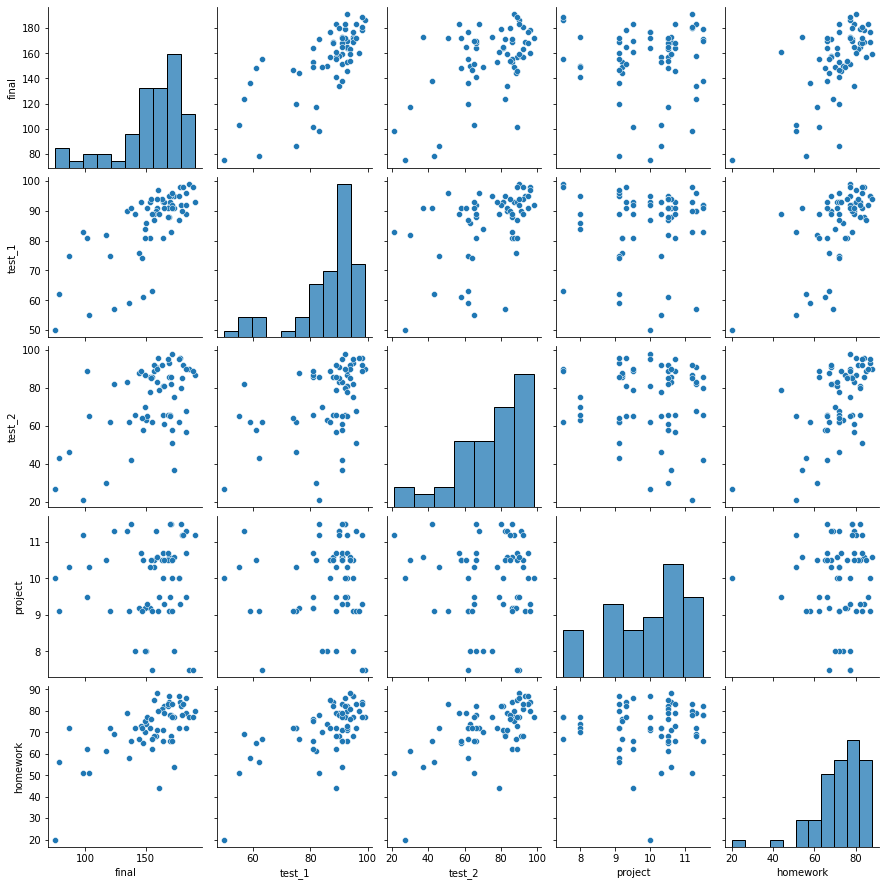

In [11]:
# Identify the least important feature
sns.pairplot(df)

In [12]:
df.corr()

,final,test_1,test_2,project,homework
final,1.000000,0.716284,0.527751,0.018288,0.633146
test_1,0.716284,1.000000,0.445727,0.064468,0.620585
test_2,0.527751,0.445727,1.000000,-0.048124,0.601441
project,0.018288,0.064468,-0.048124,1.000000,0.026469
homework,0.633146,0.620585,0.601441,0.026469,1.000000


In [ ]:
# Build the model with three features
